In [1]:
!pip install pyyaml==5.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 5.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=de1d9fe4f3431cced5b8f89d5aab3fe7d0dfbb197452063b5f5ff52435d6daf5
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 15 kB/s 
     |████████████████████████████████| 12.8 MB 30.0 MB/s 
     |████████████████████████████████| 7.6 MB 4.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0+cu113
    Uninstalling torchvision-0.13.0+cu113:
      Successfully uninstalled torchvision-0.13.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.0+cu113
    Uninstalling torchaudio-0.12.0+cu113:
      Successfully uninstalled torchaudio-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

In [5]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [6]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 740 kB/s 
     |████████████████████████████████| 79 kB 4.0 MB/s 
     |████████████████████████████████| 50 kB 8.8 MB/s 
     |████████████████████████████████| 151 kB 11.1 MB/s 
     |████████████████████████████████| 130 kB 63.0 MB/s 
     |████████████████████████████████| 843 kB 65.6 MB/s 
     |████████████████████████████████| 117 kB 62.2 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=e3a0f6622755b96707b24f4c98b91ae976ee266538732dbb99b943e4ff8550ed
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=cd6f45a7726f7063728

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import cv2
from google.colab.patches import cv2_imshow


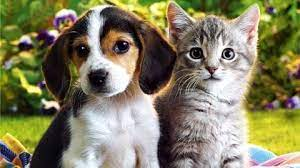

In [7]:
image=cv2.imread("./download.jpg")
cv2_imshow(image)

In [8]:
cfg=get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.6

In [9]:
predictor=DefaultPredictor(cfg)
output=predictor(image)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


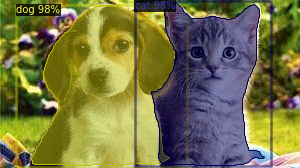

In [10]:
visual=Visualizer(image[:,:,::-1],MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
out=visual.draw_instance_predictions(output["instances"].to("cpu"))
cv2_imshow(out.get_image()[:,:,::-1])